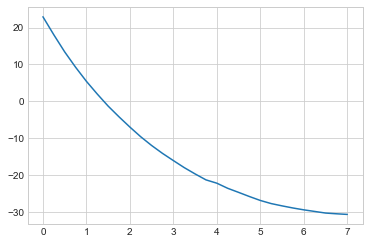

In [2]:
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

folder = "D:\FilipKalibrace"

measuredVals = np.empty(shape=[0, 3])

for file in os.listdir(folder):
    if file.endswith(".dat"):
        I = float(str(file[2:-4]).replace(',','.'))
        temps = np.loadtxt(os.path.join(folder, file))
        average = np.mean(temps)
        stdev = np.std(temps)
        measuredVals = np.append(measuredVals, [[I, average, stdev]], axis=0)
        '''
        fig = plt.figure()
        ax = plt.axes()
        ax.plot(temps);
        '''
#print(measuredVals)

fig = plt.figure()
ax = plt.axes()
ax.plot(measuredVals[:,0], measuredVals[:,1])


In [15]:
import plotly.graph_objects as go
from scipy.optimize import curve_fit

def func(x, x0, a, b):
    return a +b*(x-x0)**2
    #return a + np.exp(-(x-x0))

popt, pcov = curve_fit(func, measuredVals[:,1], measuredVals[:,0])
print(popt)

fig = go.Figure()
fig.add_trace(go.Scatter(x=measuredVals[:,1], y=measuredVals[:,0]))
fig.add_trace(go.Scatter(x=measuredVals[:,1], y=func(measuredVals[:,1], *popt)))

[1.69034976e+01 3.63270323e-01 2.59178210e-03]
